In [38]:
#https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

### We will use pandas and scikit-learn to load and explore the dataset

In [39]:
from sklearn.datasets import load_boston
boston = load_boston()

In [40]:
boston.keys() # there are 5 keys:'data', 'target', 'feature_names', 'DESCR', 'filename'

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [42]:
boston.data.shape

(506, 13)

In [43]:
boston.target.shape #there are 13 features and one target

(506,)

In [44]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Description of each column name in this dataset

In [46]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Exploratory data analysis

In [47]:
df = pd.DataFrame(boston.data)
print(df.head())



        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [48]:
df.columns = boston.feature_names
print(df.head())



      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [49]:
df["PRICE"] = boston.target
print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [50]:
print(df.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

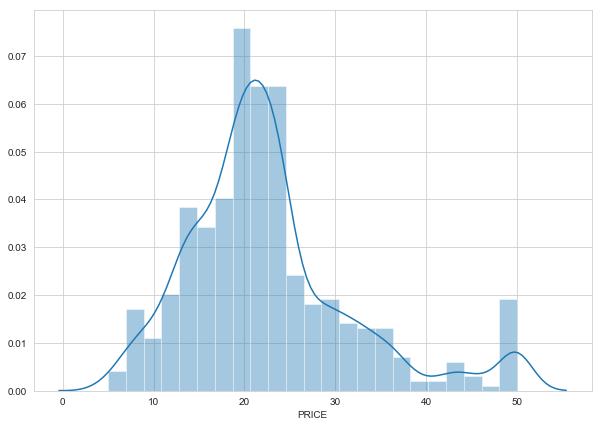

In [65]:
plt.figure(figsize=(10,7))

sns.distplot(df['PRICE'])

#there are different data distributions


### Test/Train Split and training regression models

In [55]:
import sklearn.model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.30, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [59]:
#replacing missing data with substituted values

from sklearn import preprocessing
std_bos_df = preprocessing.StandardScaler()
X_train = std_bos_df.fit_transform(X_train)
X_test=std_bos_df.transform(X_test)

y_im = pd.DataFrame(Y_train)
print(y_im.shape)
df_bos_train=pd.DataFrame(X_train)

y_im = y_im.set_index(df_bos_train.index)

df_bos_train['PRICE']= y_im

print("% of NaN Before Imputation in Price:",df_bos_train['PRICE'].isnull().sum()/len(df_bos_train['PRICE'])*100)

(354, 1)
% of NaN Before Imputation in Price: 0.0


In [62]:
#Function to sample the dataset randomly into equal batch size.
from sklearn.metrics import mean_squared_error

def random_sampling(dataset,batch_size):
    data_rand=dataset.sample(batch_size)
    x=np.array(data_rand.drop('PRICE',axis=1))
    y=np.array(data_rand['PRICE'])
    return x,y

def sgd_manual_algo(bsize):
    Wj,Bj,iteration,lr,k=np.zeros(shape=(1,13)),0,1000,0.01,len(X_train[:bsize])

    while iteration >=0:
        w0,b0,w_interm,b_interm=Wj,Bj,np.zeros(shape=(1,13)),0
        
        x,y =random_sampling(df_bos_train,bsize)
        for i in range(k):
            w_interm+=(-2)*x[i]*(y[i]-(np.dot(w0,x[i])+b0))
            b_interm+=(-2)*(y[i]-(np.dot(w0,x[i])+b0))

        Wj=(w0-lr*(w_interm)/k)
        Bj=(b0-lr*(b_interm)/k)

        iteration-=1

    print(Wj)
    print(Bj)
    return Wj,Bj
 
W,B = sgd_manual_algo(22)

Y_pred_m=list()

for i in range(len(X_test)):
    Y_lr=np.dot(W,X_test[i])+B
    Y_pred_m.append(np.asscalar(Y_lr))
    
MSE_custom=mean_squared_error(Y_test,Y_pred_m)
print('MEAN SQUARED ERROR =',MSE_custom)

[[-1.16601442  0.78311899 -0.38964686  0.15909034 -1.41301526  2.85085949
  -0.42103513 -2.66633114  2.12400799 -1.35946286 -2.02136277  1.01468639
  -3.20448336]]
[22.56010299]
MEAN SQUARED ERROR = 30.582097707757402


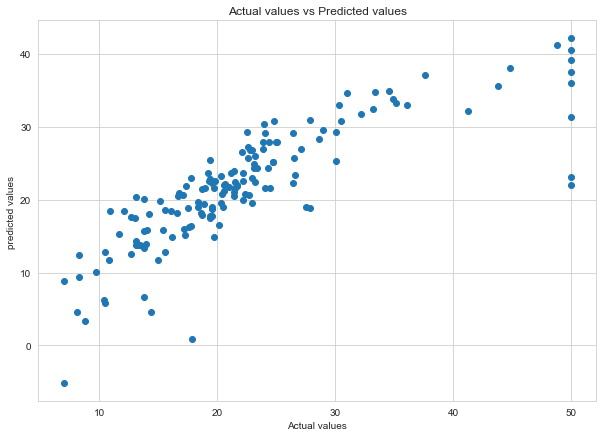

Mean Squared Error the custom SGD     :  30.582097707757402


In [75]:
#Plot a chart of predicted values Vs actual values of your own SGD Implementation
plt.figure(figsize=(10,7))

plt.scatter(Y_test,Y_pred_m)
plt.xlabel('Actual values')
plt.ylabel('predicted values ')
plt.title('Actual values vs Predicted values')
plt.show()
print("Mean Squared Error the custom SGD     : ",MSE_custom)


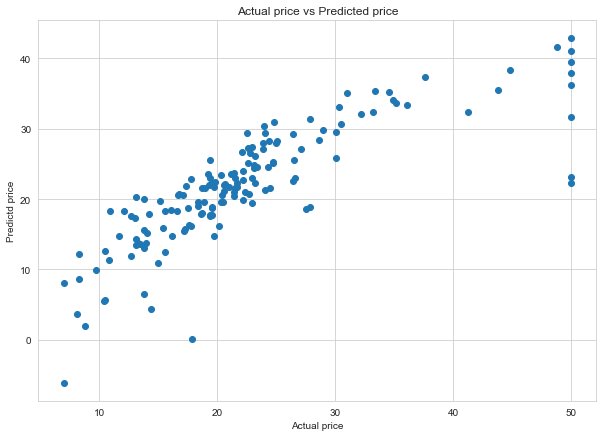

Mean squared error = 30.689912969441917


In [71]:
#SGDRegresser of sklearn and plot the chart of predicted values Vs actual values
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(penalty='none', max_iter=1000, learning_rate='constant' , eta0=0.0001  )
sgd.fit(X_train,Y_train)
Y_pred=sgd.predict(X_test)

#Scatter plot of actual price vs predicted price
plt.figure(figsize=(10,7))

plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()


MSE_sgd=mean_squared_error(Y_test,Y_pred)
print('Mean squared error =',MSE_sgd)

In [74]:
#In a tabular format,compare the weights obtained from your own 
#implementation with the weights obtained after applying sklearn's SGDRegresser.

# Creating the table using PrettyTable library

from prettytable import PrettyTable


Serialno = [1,2,3,4,5,6,7,8,9,10,11,12,13]

sgd_weights = sgd.coef_ 
table = PrettyTable()
table.add_column("S.no",Serialno)
table.add_column("Weights of Custom SGD",W.ravel())
table.add_column("Weights of Sklearn's SGD",sgd_weights)

# Printing the Table
print(table)

+------+-----------------------+--------------------------+
| S.no | Weights of Custom SGD | Weights of Sklearn's SGD |
+------+-----------------------+--------------------------+
|  1   |  -1.1660144162264967  |    -1.255475164871283    |
|  2   |   0.7831189862160244  |    0.9140691833336709    |
|  3   |  -0.38964686314143504 |   -0.2645425081647226    |
|  4   |  0.15909033909056855  |   0.19811232771666826    |
|  5   |  -1.4130152624250638  |   -1.4646937822450266    |
|  6   |   2.850859491030371   |    2.818968932862803     |
|  7   |  -0.4210351254196361  |   -0.31987389958733453   |
|  8   |   -2.66633113520959   |   -2.7349512558795617    |
|  9   |   2.124007991614841   |    2.500536938770618     |
|  10  |  -1.3594628617304463  |   -1.8355481614508593    |
|  11  |  -2.0213627682787423  |   -2.0813874474013043    |
|  12  |   1.014686390452554   |    1.1446400415515714    |
|  13  |  -3.2044833635961116  |    -3.275171805799498    |
+------+-----------------------+--------

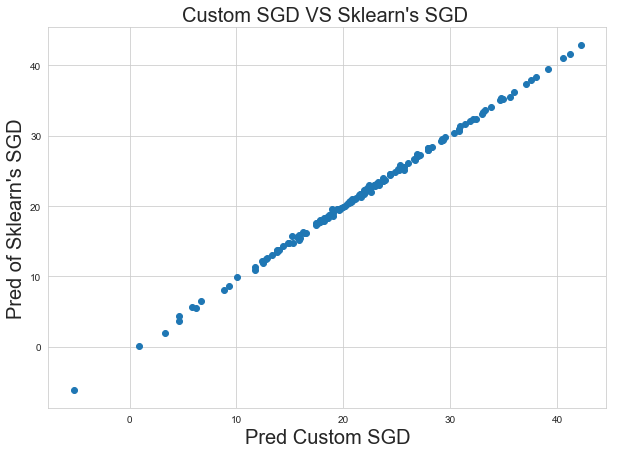

In [77]:
# Scatter Plot of the predictions of both manual SGD Regression and Sklearn's SGD Regression
plt.figure(figsize=(10,7))

plt.scatter(Y_pred_m, Y_pred)
plt.xlabel("Pred Custom SGD",size=20)
plt.ylabel("Pred of Sklearn's SGD",size=20)
plt.title("Custom SGD VS Sklearn's SGD ",size=20)
plt.show()

In [78]:
# Mean Squared Error (MSE)
print("Mean Squared Error the custom SGD     : ",MSE_custom)
print("Mean Squared Error the Sklearn's  SGD : ",MSE_sgd)

Mean Squared Error the custom SGD     :  30.582097707757402
Mean Squared Error the Sklearn's  SGD :  30.689912969441917
